In [20]:
import networkx as nx
import random as random
import numpy as np

def watts_strogatz_graph(k,n=16,seed=None):
    if k>=n:
            raise nx.NetworkXError("k>=n, choose smaller k or larger n")
    if seed is not None:
        random.seed(seed)

    nodes = list(range(0,80,5)) # nodes are labeled 0 to n-1
    n=len(nodes)
    G.name="watts_strogatz_graph(%s,%s,%s)"%(n,k,p)
    n_max = np.max(nodes)
    e_val = (n/2)+1

    # connect each node to k/2 neighbors
    for j in range(1, k // 2+1):
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        G.add_edges_from(zip(nodes,targets))
    # rewire edges from each node
    # loop over all nodes in order (label) and neighbors in order (distance)
    # no self loops or multiple edges allowed
    #for j in range(1, k // 2+1): # outer loop is neighbors
        #targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        # inner loop in node order
        for u,v in zip(nodes,targets):
            w = random.choice(nodes)
            # Enforce no self-loops or multiple edges
            while w == u or G.has_edge(u, w):
                w = random.choice(nodes)
                if G.degree(u) >= n-1:
                    break # skip this rewiring
            else:
                p = (((np.abs(u-w))/n_max)*e_val)+1
                if random.random() < p:
                    G.remove_edge(u,v)
                    G.add_edge(u,w)
                
    return G

In [24]:
import networkx as nx
import random as random
import numpy as np

def watts_strogatz_graph_x(k,x,n=16,seed=None):
    if k>=n:
            raise nx.NetworkXError("k>=n, choose smaller k or larger n")
    if seed is not None:
        random.seed(seed)

    G = nx.Graph()
    k=4
    p=0.1
    nodes = list(range(0,80,5)) # nodes are labeled 0 to n-1
    n=len(nodes)
    G.name="watts_strogatz_graph(%s,%s,%s)"%(n,k,p)
    n_max = np.max(nodes)
    e_val = (n/2)+1
    # nodes are labeled 0 to n-1
    # connect each node to k/2 neighbors
    for j in range(1, k // 2+1):
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        G.add_edges_from(zip(nodes,targets))
    # rewire edges from each node
    # loop over all nodes in order (label) and neighbors in order (distance)
    # no self loops or multiple edges allowed
    for j in range(1, k // 2+1): # outer loop is neighbors
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        # inner loop in node order
        for u,v in zip(nodes,targets):
            w = random.choice(nodes)
            # Enforce no self-loops or multiple edges
            while w == u or G.has_edge(u, w):
                w = random.choice(nodes)
                if G.degree(u) >= n-1:
                    break # skip this rewiring
            else:
                d = (((np.abs(u-w))/n_max)*e_val)+1
                p = d*pow(x,(d-1))
                if random.random() < p:
                    G.remove_edge(u,v)
                    G.add_edge(u,w)
                
    return G

In [21]:
def connected_watts_strogatz_graph_x(k, x,n=16, tries=100, seed=None):
    G = watts_strogatz_graph_x(k, x,n, seed)
    t=1
    while not nx.is_connected(G):
        G = watts_strogatz_graph_x(k, x,n, seed)
        t=t+1
        if t>tries:
            raise nx.NetworkXError("Maximum number of tries exceeded")
    return G

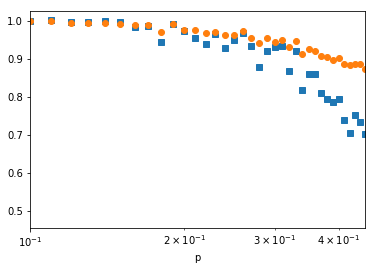

In [34]:
from __future__ import division

import networkx as nx
import pylab as pb

#rho=open('CLphd.txt','w')
n=16
k=4
prob=[0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,
      0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,
      0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,
      0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,
      0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,
      0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,
      0.58,0.59,0.6]

C=[]
L = []

niter=20
for p in prob:
    s1=0
    s2=0
    for j in range(niter):
        g2=connected_watts_strogatz_graph_x(k, p,n)
        av=nx.average_clustering(g2)
        ap=nx.average_shortest_path_length(g2)
        s1=s1+av/niter
        s2=s2+ap/niter
    C.append(s1)
    L.append(s2)
Cp=[n1/C[0] for n1 in C]    
Lp=[n2/L[0] for n2 in L]    
#for i in Cp:
    #print >> rho, i,
    #print >> rho, ''
#for j in Lp:
    #print >> rho, j,
#rho.close()
pb.figure(2)
pb.semilogx(prob,Cp,'s')
pb.semilogx(prob,Lp,'o')
pb.xlabel('p')
pb.xlim(0.1,0.45)
pb.show()

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]


/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/lib/python3/dist-packages/matplotlib/__init__.py:919: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/lib/python3/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


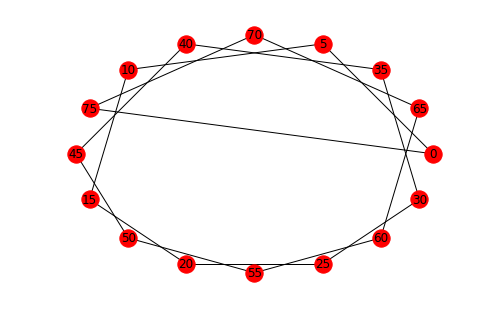

60
40
14.0666666667
38.5


In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd
import numpy as np

G = nx.Graph()
k=2
p=0.1
nodes = list(range(0,80,5)) # nodes are labeled 0 to n-1
n=len(nodes)
G.name="watts_strogatz_graph(%s,%s,%s)"%(n,k,p)

print(nodes)
# connect each node to k/2 neighbors
for j in range(1, k // 2+1):
    targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
    G.add_edges_from(zip(nodes,targets))
nx.draw_circular(G, with_labels=True)
plt.show()

nn = rd.choice(nodes)
print(nn)
mm = rd.choice(nodes)
print(mm)
pij = (((np.abs(nn-mm))/75)*49)+1
print(pij)
mx = np.max(nodes)
print((mx/2)+1)